<a href="https://colab.research.google.com/github/Jasada7/Jolko/blob/main/PM2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

# Download Data File
url = 'https://aqicn.org/data-platform/covid19/report/40180-aeef560f/2023'

response = requests.get(url)
filename = 'Air-Quality' + '-' + url.split('/')[-1] + '.csv'

with open(filename, 'wb') as file:
    file.write(response.content)

print('ดาวน์โหลดไฟล์สำเร็จ:', filename)

ดาวน์โหลดไฟล์สำเร็จ: Air-Quality-2023.csv


In [ ]:
import pandas as pd # ใช้ Pandas เพราะ Spark ใช้ Skiprows ไม่ได้

# ดำเนินการต่อไปกับข้อมูลที่อ่านเข้ามา
data = pd.read_csv('Air-Quality-2023.csv', delimiter=',', skiprows=[0, 1, 2, 3])

# ตัวอย่าง: พิมพ์ข้อมูลบางส่วนแรกของไฟล์
data

,Date,Country,City,Specie,count,min,max,median,variance
0,2022-01-17,CH,Zürich,dew,38,-2.5,1.0,-1.0,9.31
1,2022-07-16,CH,Zürich,dew,44,6.0,11.5,9.0,15.44
2,2022-12-22,CH,Zürich,dew,64,4.5,7.0,5.5,4.78
3,2023-03-02,CH,Zürich,dew,49,-4.0,-1.0,-2.0,5.31
4,2023-05-20,CH,Zürich,dew,66,6.5,13.0,10.0,41.60
...,...,...,...,...,...,...,...,...,...
3256113,2023-05-01,UZ,Tashkent,pm10,21,20.0,63.0,37.0,2003.29
3256114,2023-02-13,UZ,Tashkent,pm10,13,29.0,81.0,60.0,1323.08
3256115,2023-02-23,UZ,Tashkent,pm10,23,14.0,69.0,41.0,2912.37
3256116,2023-04-18,UZ,Tashkent,pm10,20,18.0,60.0,42.0,1827.87


In [ ]:
data.describe()

,count,min,max,median,variance
count,3.256118e+06,3.256118e+06,3.256118e+06,3.256118e+06,3.256118e+06
mean,1.269531e+02,1.085686e+02,1.372018e+02,1.199631e+02,3.021221e+03
std,1.832217e+02,2.938425e+02,2.959423e+02,2.944547e+02,9.273589e+04
min,2.000000e+00,-3.269200e+03,-2.635700e+03,-3.007600e+03,0.000000e+00
25%,4.200000e+01,1.000000e+00,9.900000e+00,4.000000e+00,1.914000e+01
50%,7.200000e+01,5.000000e+00,2.700000e+01,1.410000e+01,1.075200e+02
75%,1.440000e+02,2.400000e+01,8.370000e+01,4.800000e+01,7.226700e+02
max,2.640000e+03,2.511000e+03,3.276700e+03,2.996000e+03,7.607260e+07


In [ ]:
data.dtypes

Date         object
Country      object
City         object
Specie       object
count         int64
min         float64
max         float64
median      float64
variance    float64
dtype: object

In [ ]:
# เปลี่ยนคอลัมน์ Date เป็นรูปแบบ DateTime
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Country,City,Specie,count,min,max,median,variance
0,2022-01-17,CH,Zürich,dew,38,-2.5,1.0,-1.0,9.31
1,2022-07-16,CH,Zürich,dew,44,6.0,11.5,9.0,15.44
2,2022-12-22,CH,Zürich,dew,64,4.5,7.0,5.5,4.78
3,2023-03-02,CH,Zürich,dew,49,-4.0,-1.0,-2.0,5.31
4,2023-05-20,CH,Zürich,dew,66,6.5,13.0,10.0,41.60
...,...,...,...,...,...,...,...,...,...
3256113,2023-05-01,UZ,Tashkent,pm10,21,20.0,63.0,37.0,2003.29
3256114,2023-02-13,UZ,Tashkent,pm10,13,29.0,81.0,60.0,1323.08
3256115,2023-02-23,UZ,Tashkent,pm10,23,14.0,69.0,41.0,2912.37
3256116,2023-04-18,UZ,Tashkent,pm10,20,18.0,60.0,42.0,1827.87


In [ ]:
data.dtypes

Date        datetime64[ns]
Country             object
City                object
Specie              object
count                int64
min                float64
max                float64
median             float64
variance           float64
dtype: object

In [ ]:
data['Specie'].unique()

array(['dew', 'pm10', 'o3', 'no2', 'pressure', 'wind-gust', 'temperature',
       'humidity', 'so2', 'pm25', 'wind-speed', 'co', 'precipitation',
       'wd', 'uvi', 'pm1', 'aqi', 'mepaqi', 'neph'], dtype=object)

In [ ]:
import sqlite3

# สร้างการเชื่อมต่อฐานข้อมูล SQLite
conn = sqlite3.connect('mydatabase.db')

In [ ]:
# แปลง DataFrame เป็นตาราง SQL และบันทึกในฐานข้อมูล
data.to_sql('my_table', conn, if_exists='replace', index=False)

3256118

In [ ]:
# สร้าง Cursor สำหรับการประมวลผลคำสั่ง SQL
cursor = conn.cursor()

In [ ]:
# เลือกและแสดงข้อมูล
query = ("""
    SELECT *
    FROM my_table
    WHERE Country = 'TH' AND City = 'Chiang Mai'
""")

df = pd.read_sql_query(query, conn)
df

,Date,Country,City,Specie,count,min,max,median,variance
0,2022-03-29 00:00:00,TH,Chiang Mai,dew,234,18.0,23.0,20.5,12.55
1,2022-06-09 00:00:00,TH,Chiang Mai,dew,260,21.0,26.0,22.5,9.22
2,2022-12-24 00:00:00,TH,Chiang Mai,dew,120,16.0,19.0,18.0,10.85
3,2022-12-30 00:00:00,TH,Chiang Mai,dew,95,15.0,18.0,17.0,7.54
4,2023-02-14 00:00:00,TH,Chiang Mai,dew,120,3.0,13.0,9.5,106.51
...,...,...,...,...,...,...,...,...,...
6859,2022-08-11 00:00:00,TH,Chiang Mai,no2,3,0.6,0.6,0.6,0.00
6860,2022-10-25 00:00:00,TH,Chiang Mai,no2,3,0.6,0.6,0.6,0.00
6861,2023-03-15 00:00:00,TH,Chiang Mai,no2,3,0.6,0.6,0.6,0.00
6862,2022-02-28 00:00:00,TH,Chiang Mai,no2,62,0.6,15.6,5.2,152.09


In [ ]:
# สร้างตาราง pivoted_dt โดยใช้ pivot_table และ aggfunc='median'
pivoted_dt = df.pivot_table(index=['Date', 'City'], columns='Specie', aggfunc='median')
pivoted_dt.columns = pivoted_dt.columns.droplevel(0)

pivoted_dt.reset_index(inplace=True)

<ipython-input-184-221fb3915c1f>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivoted_dt = df.pivot_table(index=['Date', 'City'], columns='Specie', aggfunc='median')


In [ ]:
pivoted_dt['Date'] = pd.to_datetime(pivoted_dt['Date'])
pivoted_dt

Specie,Date,City,co,dew,humidity,no2,o3,pm1,pm10,pm25,...,o3,pm1,pm10,pm25,precipitation,pressure,so2,temperature,wind-gust,wind-speed
0,2021-12-27,Chiang Mai,69.0,285.0,303.0,57.0,85.0,24.0,452.0,452.0,...,836.30,639.98,2129.74,10982.70,NaN,58.29,1.32,1558.97,81.75,8.73
1,2021-12-28,Chiang Mai,93.0,306.0,302.0,64.0,91.0,24.0,488.0,487.0,...,845.43,291.29,1836.57,10262.60,NaN,63.57,0.64,1633.11,63.96,5.73
2,2021-12-29,Chiang Mai,92.0,385.0,261.0,63.0,91.0,24.0,438.0,434.0,...,974.59,583.41,1976.01,10452.70,NaN,58.92,2.00,1561.07,47.32,4.86
3,2021-12-30,Chiang Mai,91.0,357.0,265.0,61.0,88.0,24.0,460.0,460.0,...,569.74,897.23,1557.04,7808.49,NaN,66.12,0.33,1547.63,52.53,6.06
4,2021-12-31,Chiang Mai,95.0,301.0,263.0,81.0,86.0,24.0,444.0,444.0,...,847.20,771.02,1487.56,8269.13,NaN,64.75,6.62,1579.51,48.88,6.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2023-07-11,Chiang Mai,NaN,115.0,120.0,NaN,16.0,23.0,48.0,117.0,...,5.44,420.63,32.92,2561.28,NaN,19.32,NaN,82.84,NaN,22.07
562,2023-07-12,Chiang Mai,NaN,120.0,120.0,NaN,9.0,24.0,48.0,115.0,...,2.84,271.26,24.91,2247.54,NaN,11.13,0.00,57.56,NaN,9.39
563,2023-07-13,Chiang Mai,NaN,105.0,120.0,NaN,13.0,18.0,48.0,119.0,...,0.94,539.56,81.85,2129.79,NaN,28.34,NaN,117.12,NaN,24.38
564,2023-07-14,Chiang Mai,NaN,90.0,120.0,NaN,21.0,16.0,48.0,109.0,...,1.36,334.56,37.21,2924.21,NaN,21.74,NaN,79.41,0.00,9.39


In [ ]:
pivoted_dt_unique = pivoted_dt.loc[:, ~pivoted_dt.columns.duplicated()]
pivoted_dt_unique

Specie,Date,City,co,dew,humidity,no2,o3,pm1,pm10,pm25,precipitation,pressure,so2,temperature,wind-gust,wind-speed
0,2021-12-27,Chiang Mai,69.0,285.0,303.0,57.0,85.0,24.0,452.0,452.0,NaN,546.0,26.0,457.0,103.0,491.0
1,2021-12-28,Chiang Mai,93.0,306.0,302.0,64.0,91.0,24.0,488.0,487.0,NaN,528.0,25.0,490.0,100.0,451.0
2,2021-12-29,Chiang Mai,92.0,385.0,261.0,63.0,91.0,24.0,438.0,434.0,NaN,522.0,27.0,439.0,103.0,474.0
3,2021-12-30,Chiang Mai,91.0,357.0,265.0,61.0,88.0,24.0,460.0,460.0,NaN,491.0,14.0,466.0,112.0,425.0
4,2021-12-31,Chiang Mai,95.0,301.0,263.0,81.0,86.0,24.0,444.0,444.0,NaN,489.0,11.0,459.0,116.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2023-07-11,Chiang Mai,NaN,115.0,120.0,NaN,16.0,23.0,48.0,117.0,NaN,120.0,NaN,120.0,NaN,120.0
562,2023-07-12,Chiang Mai,NaN,120.0,120.0,NaN,9.0,24.0,48.0,115.0,NaN,120.0,3.0,120.0,NaN,120.0
563,2023-07-13,Chiang Mai,NaN,105.0,120.0,NaN,13.0,18.0,48.0,119.0,NaN,120.0,NaN,120.0,NaN,120.0
564,2023-07-14,Chiang Mai,NaN,90.0,120.0,NaN,21.0,16.0,48.0,109.0,NaN,120.0,NaN,120.0,5.0,120.0


In [ ]:
pivoted_dt_unique.describe()

Specie,co,dew,humidity,no2,o3,pm1,pm10,pm25,precipitation,pressure,so2,temperature,wind-gust,wind-speed
count,478.000000,566.000000,566.000000,533.000000,566.000000,464.000000,566.000000,566.000000,16.00000,566.000000,523.000000,566.000000,322.000000,566.000000
mean,63.742678,191.754417,158.522968,16.547842,30.335689,23.349138,226.060071,236.441696,9.50000,278.650177,11.655832,247.597173,93.919255,261.646643
std,14.357618,90.371572,45.976123,22.204282,19.791847,2.215905,138.694660,126.264770,10.44988,154.457571,7.050726,127.305876,29.118295,140.608131
min,5.000000,10.000000,72.000000,2.000000,8.000000,8.000000,30.000000,58.000000,2.00000,72.000000,2.000000,72.000000,5.000000,72.000000
25%,67.000000,110.000000,120.000000,3.000000,18.000000,24.000000,94.000000,117.000000,2.00000,120.000000,6.000000,120.000000,84.000000,120.000000
50%,68.000000,177.500000,144.000000,3.000000,21.000000,24.000000,252.000000,251.000000,3.50000,368.000000,10.000000,261.500000,96.000000,322.000000
75%,69.000000,276.000000,192.000000,21.000000,43.000000,24.000000,358.000000,357.000000,16.75000,419.000000,16.000000,368.000000,109.000000,395.000000
max,95.000000,385.000000,303.000000,88.000000,91.000000,24.000000,488.000000,487.000000,31.00000,546.000000,36.000000,490.000000,164.000000,491.000000


In [ ]:
pivoted_dt_unique.drop("precipitation", axis=1, inplace=True)
pivoted_dt_unique

<ipython-input-188-ed42f37a0ac8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivoted_dt_unique.drop("precipitation", axis=1, inplace=True)


Specie,Date,City,co,dew,humidity,no2,o3,pm1,pm10,pm25,pressure,so2,temperature,wind-gust,wind-speed
0,2021-12-27,Chiang Mai,69.0,285.0,303.0,57.0,85.0,24.0,452.0,452.0,546.0,26.0,457.0,103.0,491.0
1,2021-12-28,Chiang Mai,93.0,306.0,302.0,64.0,91.0,24.0,488.0,487.0,528.0,25.0,490.0,100.0,451.0
2,2021-12-29,Chiang Mai,92.0,385.0,261.0,63.0,91.0,24.0,438.0,434.0,522.0,27.0,439.0,103.0,474.0
3,2021-12-30,Chiang Mai,91.0,357.0,265.0,61.0,88.0,24.0,460.0,460.0,491.0,14.0,466.0,112.0,425.0
4,2021-12-31,Chiang Mai,95.0,301.0,263.0,81.0,86.0,24.0,444.0,444.0,489.0,11.0,459.0,116.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2023-07-11,Chiang Mai,NaN,115.0,120.0,NaN,16.0,23.0,48.0,117.0,120.0,NaN,120.0,NaN,120.0
562,2023-07-12,Chiang Mai,NaN,120.0,120.0,NaN,9.0,24.0,48.0,115.0,120.0,3.0,120.0,NaN,120.0
563,2023-07-13,Chiang Mai,NaN,105.0,120.0,NaN,13.0,18.0,48.0,119.0,120.0,NaN,120.0,NaN,120.0
564,2023-07-14,Chiang Mai,NaN,90.0,120.0,NaN,21.0,16.0,48.0,109.0,120.0,NaN,120.0,5.0,120.0


In [ ]:
# สร้างตารางเฉพาะคอลัมน์ที่ต้องการ
selected_cols = ['Date', 'co', 'dew', 'humidity', 'no2', 'o3', 'pm1', 'pm10', 'pm25', 'pressure', 'so2', 'temperature', 'wind-gust', 'wind-speed']
pivoted_dt_selected = pivoted_dt_unique[selected_cols]

# คำนวณค่าเฉลี่ยเคลื่อนที่ (moving average) โดยใช้ window size เท่ากับ 3
moving_avg = pivoted_dt_selected.fillna(pivoted_dt_selected.rolling(window=3, min_periods=1).mean())
data_cleaning = moving_avg.dropna()
data_cleaning

<ipython-input-189-85ea5740c57f>:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object', name='Specie')
  moving_avg = pivoted_dt_selected.fillna(pivoted_dt_selected.rolling(window=3, min_periods=1).mean())


Specie,Date,co,dew,humidity,no2,o3,pm1,pm10,pm25,pressure,so2,temperature,wind-gust,wind-speed
0,2021-12-27,69.0,285.0,303.0,57.0,85.0,24.0,452.0,452.0,546.0,26.0,457.0,103.0,491.0
1,2021-12-28,93.0,306.0,302.0,64.0,91.0,24.0,488.0,487.0,528.0,25.0,490.0,100.0,451.0
2,2021-12-29,92.0,385.0,261.0,63.0,91.0,24.0,438.0,434.0,522.0,27.0,439.0,103.0,474.0
3,2021-12-30,91.0,357.0,265.0,61.0,88.0,24.0,460.0,460.0,491.0,14.0,466.0,112.0,425.0
4,2021-12-31,95.0,301.0,263.0,81.0,86.0,24.0,444.0,444.0,489.0,11.0,459.0,116.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2023-03-20,23.0,115.0,120.0,3.0,20.0,24.0,96.0,120.0,120.0,2.0,120.0,5.0,120.0
481,2023-04-22,23.0,110.0,120.0,3.0,23.0,24.0,96.0,119.0,120.0,2.0,120.0,5.0,120.0
482,2023-04-23,23.0,120.0,120.0,3.0,22.0,23.0,92.0,117.0,120.0,2.0,120.0,5.0,120.0
483,2023-04-24,23.0,110.0,120.0,3.0,13.0,24.0,94.0,118.0,120.0,3.0,120.0,5.0,120.0


In [ ]:
data_cleaning.describe()

Specie,co,dew,humidity,no2,o3,pm1,pm10,pm25,pressure,so2,temperature,wind-gust,wind-speed
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,65.330472,264.300429,197.377682,32.369099,47.240343,23.347639,346.394850,347.124464,402.592275,13.349785,344.557940,96.051502,373.133047
std,13.050144,67.496391,43.356321,25.876385,21.191302,2.210224,92.000367,86.676355,99.221675,7.605506,86.442812,31.156818,92.277899
min,5.000000,75.000000,120.000000,3.000000,13.000000,11.000000,88.000000,107.000000,120.000000,2.000000,120.000000,5.000000,110.000000
25%,68.000000,239.000000,164.000000,3.000000,22.000000,24.000000,334.000000,333.000000,392.000000,7.000000,331.000000,85.000000,351.000000
50%,68.000000,277.000000,201.000000,36.000000,50.000000,24.000000,367.000000,366.000000,420.000000,12.000000,364.000000,99.000000,400.000000
75%,69.000000,311.000000,230.000000,58.000000,66.000000,24.000000,402.000000,401.000000,457.000000,18.000000,397.000000,112.000000,428.000000
max,95.000000,385.000000,303.000000,88.000000,91.000000,24.000000,488.000000,487.000000,546.000000,36.000000,490.000000,164.000000,491.000000


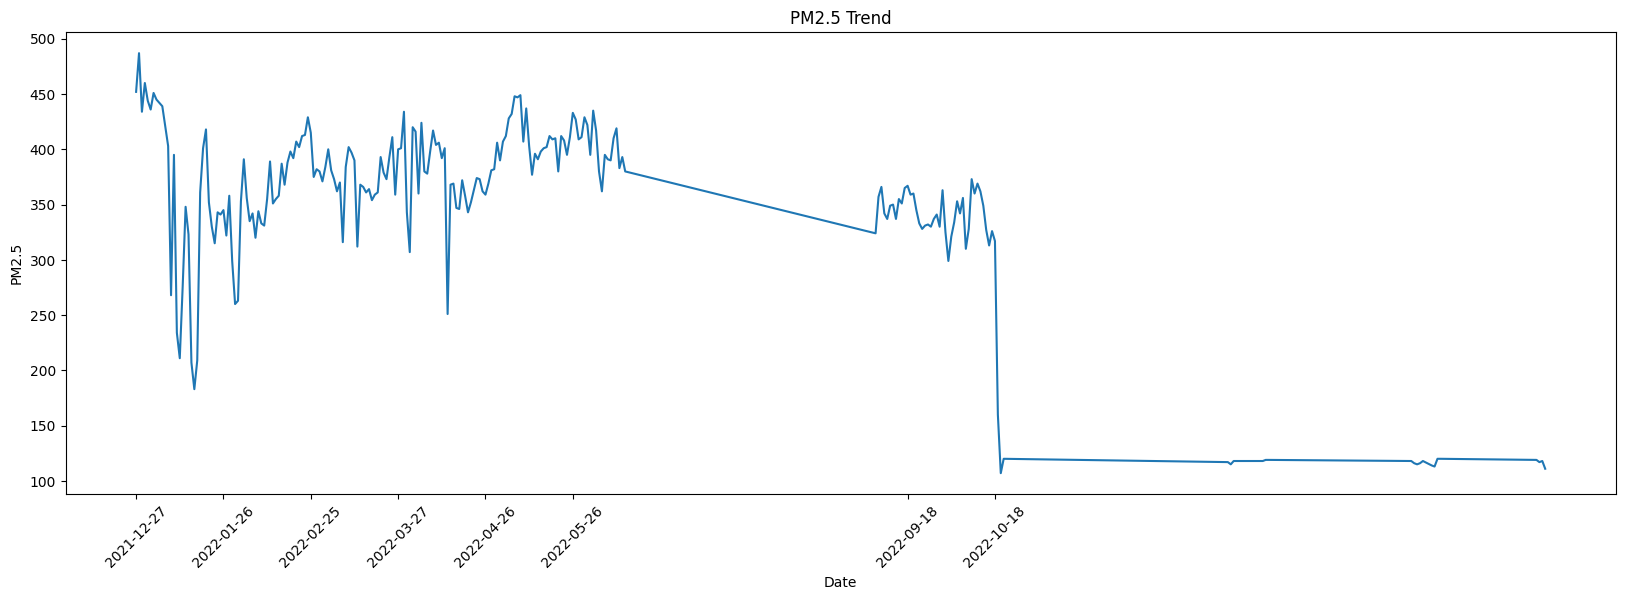

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# สร้างกราฟ
plt.figure(figsize=(20, 6))
plt.plot(data_cleaning['Date'], data_cleaning['pm25'])
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('PM2.5 Trend')
plt.xticks(rotation=45)

# กำหนดค่าที่แสดงบนแกน x
x_ticks = data_cleaning['Date'][::30]  # เลือกแต่ละเดือน
plt.xticks(x_ticks, rotation=45)

plt.show()

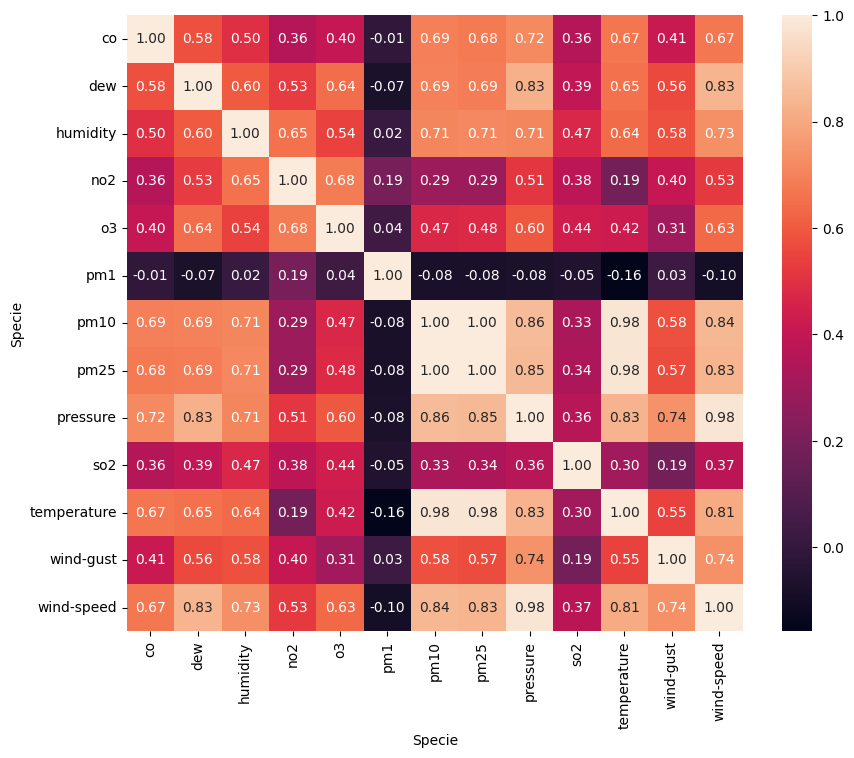

In [ ]:
import seaborn as sns

# สร้างตารางที่มีเฉพาะคอลัมน์ที่ต้องการวิเคราะห์
selected_cols = ['co', 'dew', 'humidity', 'no2', 'o3', 'pm1', 'pm10', 'pm25', 'pressure', 'so2', 'temperature', 'wind-gust', 'wind-speed']
selected_data = data_cleaning[selected_cols]

# คำนวณค่าสัมพันธ์ของคอลัมน์
corr_matrix = selected_data.corr()

# สร้างกราฟแมทริกซ์การสัมพันธ์ปีรสันต์ (Pearson correlation matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', square=True)

# กำหนดการแสดงผลชื่อคอลัมน์ในแกน x และแกน y
plt.gca().set_xticklabels(selected_cols, rotation=90, ha='center')
plt.gca().set_yticklabels(selected_cols, rotation=0, va='center')

# แสดงกราฟ
plt.show()

# ค่าที่มีความสัมพันธ์กับ PM2.5 มากที่สุด ⁉

*   co: 0.675358
*   dew: 0.685397
*   humidity: 0.710706
*   no2: 0.292539
*   o3: 0.477674
*   pm1: -0.076894
*   pm10: 0.997844
*   pressure: 0.847234
*   so2: 0.339619
*   temperature: 0.978921
*   wind-gust: 0.567016
*   wind-speed: 0.834484

ค่าที่มีความสัมพันธ์กับ pm25 มีค่าที่แตกต่างกันอยู่ในช่วงตั้งแต่ -1 ถึง 1 โดยค่าที่ใกล้เคียง 1 หรือ -1 จะแสดงถึงความสัมพันธ์ที่เข้มแข็งมากขึ้น ในที่นี้ค่าที่ใกล้เคียงกับ 1 และ -1 มีค่าดังนี้:

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# สร้าง DataFrame ของตัวแปรตามและตัวแปรอิสระ
data = pd.DataFrame({
    'pm25': data_cleaning['pm25'],
    'temperature': data_cleaning['temperature'],
    'pressure': data_cleaning['pressure'],
    'wind-speed': data_cleaning['wind-speed'],
    'humidity': data_cleaning['humidity'],
    'dew': data_cleaning['dew'],
    'co': data_cleaning['co']
})

# โดยเลือกค่าตั้งแต่ 0.6 ขึ้นไปมาทำการเข้า Module พยากรณ์

*  temperature: 0.978921
*  pressure: 0.847234
*  wind-speed: 0.834484
*  humidity: 0.710706
*  dew: 0.685397
*  co: 0.675358

In [ ]:
# เพิ่ม intercept term
data = sm.add_constant(data)

In [ ]:
# แบ่งข้อมูลเป็น train set และ test set
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

In [ ]:
# สร้างโมเดล linear regression จาก train set
model = sm.OLS(train_data['pm25'], train_data[['temperature', 'pressure', 'wind-speed', 'humidity', 'dew', 'co']])

In [ ]:
# Fit โมเดล
results = model.fit()

# แสดงผลลัพธ์
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   pm25   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.592e+04
Date:                Sat, 15 Jul 2023   Prob (F-statistic):                   7.87e-216
Time:                        09:38:24   Log-Likelihood:                         -669.49
No. Observations:                 163   AIC:                                      1351.
Df Residuals:                     157   BIC:                                      1370.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature     0.8488      0.025     34.204      0.000       0.800       0.898
pressure       -0.0066      0.065     -0.103      0.918      -0.134       0.121
wind-speed      0.0364      0.068      0.538      0.591      -0.097       0.170
humidity        0.2257      0.039      5.720      0.000       0.148       0.304
dew             0.0289      0.030      0.953      0.342      -0.031       0.089
co             -0.1151      0.118     -0.973      0.332      -0.349       0.119
==============================================================================
Omnibus:                       59.538   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.175
Skew:                           0.979   Prob(JB):                    3.82e-127
Kurtosis:                      12.049   Cond. No.                         80.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# ทดสอบโมเดลด้วย test set
predictions = results.predict(test_data[['temperature', 'pressure', 'wind-speed', 'humidity', 'dew', 'co']])

# สร้าง DataFrame เพื่อเก็บข้อมูลพยากรณ์
predictions_df = pd.DataFrame({'Actual': test_data['pm25'], 'Predicted': predictions})
predictions_df

,Actual,Predicted
84,393.0,400.559490
377,118.0,131.979773
483,118.0,133.035965
9,439.0,445.962554
126,407.0,399.999741
...,...,...
442,118.0,133.092292
67,381.0,367.957246
438,118.0,130.002516
29,341.0,340.185597


 pm25 = 0.8488 * temperature - 0.0066 * pressure + 0.0364 * wind-speed + 0.2257 * humidity + 0.0289 * dew - 0.1151 * co

In [ ]:
data_cleaning['pm25_predicted'] = 0.8488 * data_cleaning['temperature'] - 0.0066 * data_cleaning['pressure'] + 0.0364 * data_cleaning['wind-speed'] + 0.2257 * data_cleaning['humidity'] + 0.0289 * data_cleaning['dew'] - 0.1151 * data_cleaning['co']

<ipython-input-203-689e3cecbf0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaning['pm25_predicted'] = 0.8488 * data_cleaning['temperature'] - 0.0066 * data_cleaning['pressure'] + 0.0364 * data_cleaning['wind-speed'] + 0.2257 * data_cleaning['humidity'] + 0.0289 * data_cleaning['dew'] - 0.1151 * data_cleaning['co']


In [ ]:
data_cleaning['Date'] = pd.to_datetime(data_cleaning['Date'])
data_cleaning

<ipython-input-204-379bbf4fdf8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaning['Date'] = pd.to_datetime(data_cleaning['Date'])


Specie,Date,co,dew,humidity,no2,o3,pm1,pm10,pm25,pressure,so2,temperature,wind-gust,wind-speed,pm25_predicted
0,2021-12-27,69.0,285.0,303.0,57.0,85.0,24.0,452.0,452.0,546.0,26.0,457.0,103.0,491.0,470.8521
1,2021-12-28,93.0,306.0,302.0,64.0,91.0,24.0,488.0,487.0,528.0,25.0,490.0,100.0,451.0,495.1441
2,2021-12-29,92.0,385.0,261.0,63.0,91.0,24.0,438.0,434.0,522.0,27.0,439.0,103.0,474.0,445.8766
3,2021-12-30,91.0,357.0,265.0,61.0,88.0,24.0,460.0,460.0,491.0,14.0,466.0,112.0,425.0,467.4239
4,2021-12-31,95.0,301.0,263.0,81.0,86.0,24.0,444.0,444.0,489.0,11.0,459.0,116.0,431.0,459.1837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2023-03-20,23.0,115.0,120.0,3.0,20.0,24.0,96.0,120.0,120.0,2.0,120.0,5.0,120.0,133.1922
481,2023-04-22,23.0,110.0,120.0,3.0,23.0,24.0,96.0,119.0,120.0,2.0,120.0,5.0,120.0,133.0477
482,2023-04-23,23.0,120.0,120.0,3.0,22.0,23.0,92.0,117.0,120.0,2.0,120.0,5.0,120.0,133.3367
483,2023-04-24,23.0,110.0,120.0,3.0,13.0,24.0,94.0,118.0,120.0,3.0,120.0,5.0,120.0,133.0477


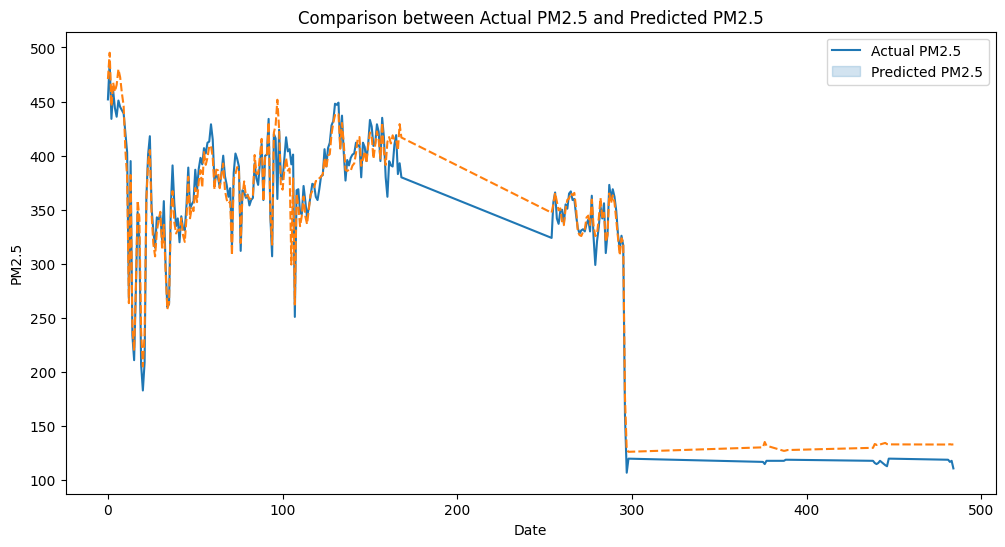

In [ ]:
# สร้างกราฟเปรียบเทียบค่า pm25 ที่พยากรณ์ได้และค่า pm25 จริง
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_cleaning[['pm25', 'pm25_predicted']])
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('Comparison between Actual PM2.5 and Predicted PM2.5')
plt.legend(['Actual PM2.5', 'Predicted PM2.5'])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# คำนวณ Mean Squared Error (MSE)
mse = mean_squared_error(data_cleaning['pm25'], data_cleaning['pm25_predicted'])
print("Mean Squared Error (MSE):", mse)

# คำนวณ Root Mean Squared Error (RMSE)
rmse = mean_squared_error(data_cleaning['pm25'], data_cleaning['pm25_predicted'], squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# คำนวณ R-squared (R²)
r2 = r2_score(data_cleaning['pm25'], data_cleaning['pm25_predicted'])
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 228.49419084053628
Root Mean Squared Error (RMSE): 15.116024306693088
R-squared (R²): 0.9694548809379603
